
Instituto Federal de Educação, Ciência e Tecnologia de Santa Catarina
Campus Florianópolis


Engenharia Eletrônica


SCM22108 - Sistemas de Comunicação


                    
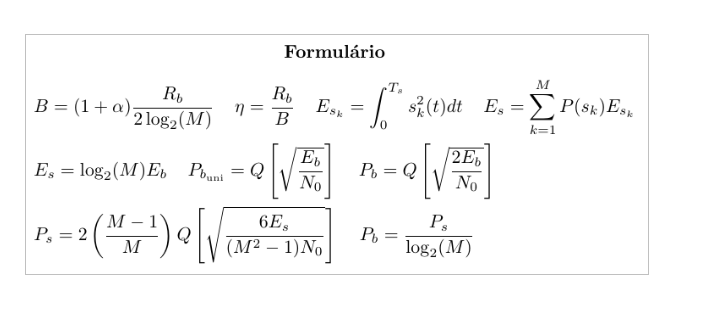



eb = energia de bit

pb= probablildade erro de bit

ps = probabilidade de simbolo

no = ruido em db

bw/B = banda de transmissão

es = erro simbolo

m = simbolo

q = qfunc

Rb = bittrade

Es = energia de simbolo

SK/Esk/P(sk)/sk(t) => 4 simbolos significa 4 sinais ou 4 possibilidades de sinais. sendo que cada um deles podem ter amplitudes diferentes - S. k será quantos simbolos teremos.

ou sejá será calculado na integral de Esk a area de sinal do k(em questão.)

e a energia de simbolo es será calculado estatisticamente. se for 2 simbolos (50% de possibilidade de casa acontecer)equiparente será p(sk) = 0.5*simbolo em cada situação vezes o Esk

#qfunc - arquivo
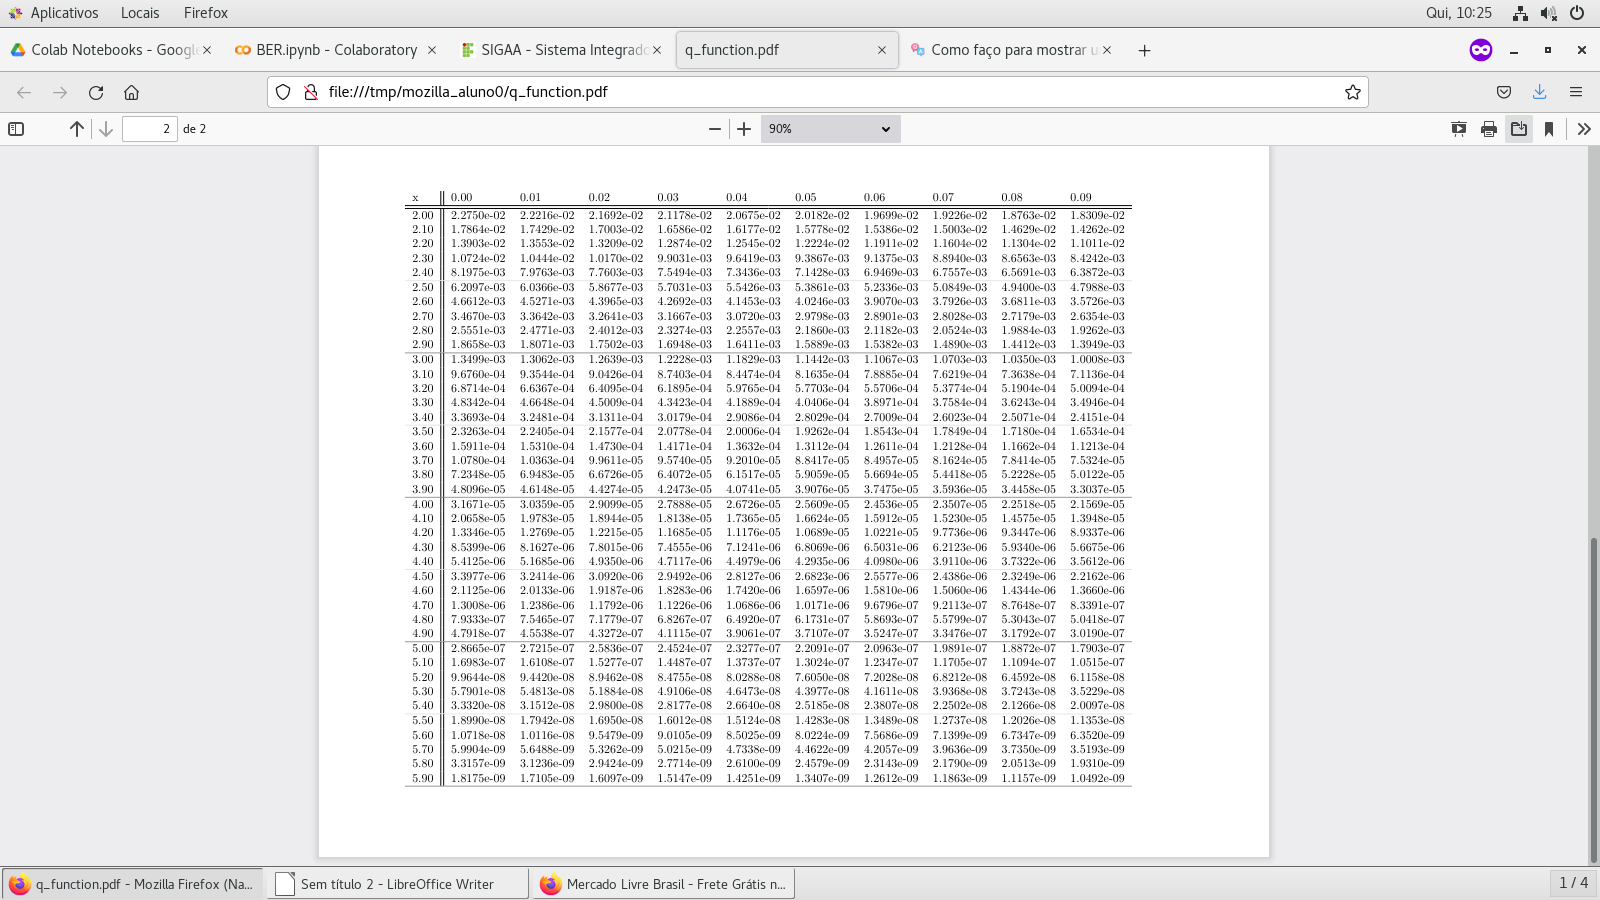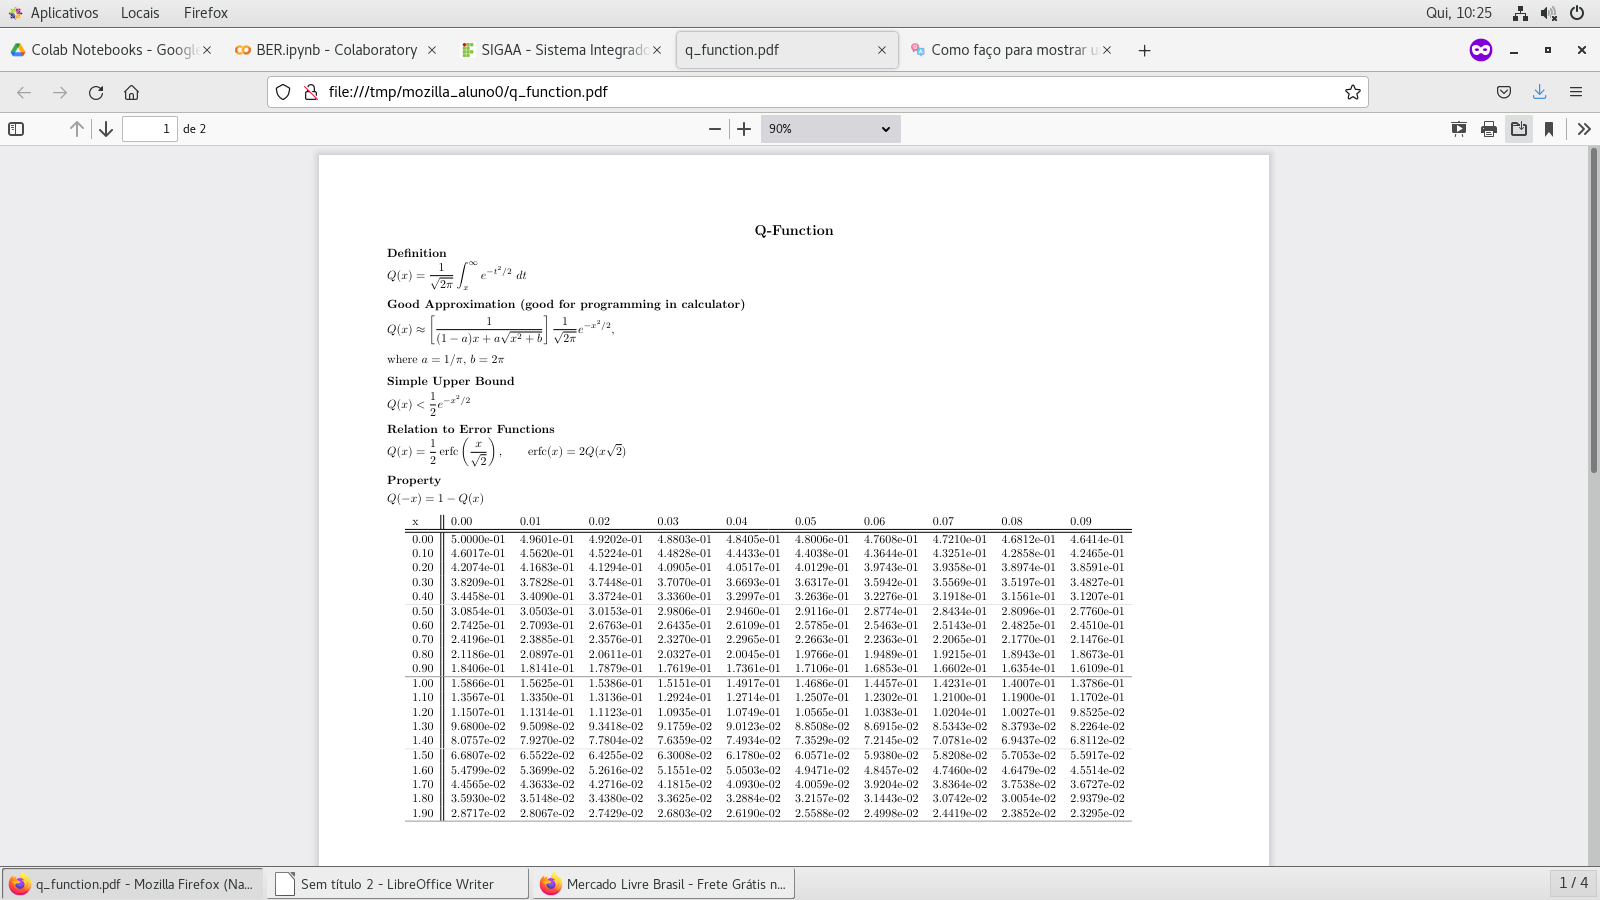


1. Em um receptor de pulsos em banda base, sabe-se que a razão Eb/N0 é de 15 dB. Determine a BER para o caso de uma codificação NRZ unipolar e para o caso da codificação NRZ bipolar. (Dica: utilize uma tabela de x e Q(x) ou simule utilizando a função qfunc(x)  - octave)

In [ ]:
import numpy as np
import math
from scipy import special as sp
import matplotlib.pyplot as plt


def qfunc(arg):
  return 0.5-0.5*sp.erf(arg/np.sqrt(2)) 

ebno_db = 15 
ebn0 = 10**(ebno_db/10)

ber_unipolar = qfunc(math.sqrt(ebn0))
ber_polar = qfunc(math.sqrt(2*ebn0))

print(format(ber_unipolar, "5.5e"))
print(format(ber_polar, "5.5e"))



9.36104e-09
8.88178e-16


2. Considere um certo sistema digital que tolera uma BER de até 10e-6 . Os pulsos são transmitidos usando o código de linha NRZ unipolar e a densidade espectral do ruído presente no
canal em questão é -60 dBW/Hz. Determine:

(a) A menor energia média de bit que pode ser utilizada;


(b) Supondo que o sistema opera com uma taxa de 1 Mbps, qual a menor amplitude possı́vel
que pode ser utilizada para a transmissão dos pulsos? Desconsidere o efeito de atenuação
do canal.


(c) Qual o limiar de detecção ótimo para o caso de símbolos equiprováveis?

In [ ]:
rb = 1e6
tb = 1/rb
nodb = -60
no = 10**(nodb/10)
##usando a tabela q_funcition.pfd
x = 4.265 #função inversa para ber = 10e-6
#print(qfunc(4.265))
eb = no*(np.power(x,2))
print(format(eb, "5.5e"))
print("letra A em cim") #para manter essa ber de 10e-6 preciso ter esse erro de bit

A = np.sqrt((2*eb)/tb)
print(format(A, "5.5e"))
print("letra B em cima") #para manter essa probalidade de erro de bit preciso ter essa amplitude.



print("letra C - ?") 


1.81902e-05
letra A em cim
6.03162e+00
letra B em cima
letra C - ?


3. Um sinal de voz é amostrado a uma taxa de 8 kHz, quantizado com 8 bits/amostra e transmitido através de um modulador M-PAM. Determine a menor banda de transmissão possível quando:

(a) M = 4;

(b) M = 8;

(c) M = 16.


In [ ]:
#m = niveis 
m = 16
#taxa de amostra 8k e quantizado 8bits logo 8k*8
fs = 8e3
amostras = 8
rb = fs*amostras
rollooff = 0.7
bw = (1+rollooff)*(rb/(2*np.log2(m)))
print(bw)



13600.0


4. Determine, para cada item da questão anterior, a probabilidade de erro considerando uma
razão Es /No de 30 dB.


In [ ]:
esno_db = 1.25
esno = 10**(esno_db/10)
m=4
ps = 2*((m-1)/m)*qfunc(np.sqrt((6/(np.power(m,2)-1))*esno))
pb = ps/np.log2(m)

print(format(ps, "5.5e"))
print(format(pb, "5.5e"))

3.48883e-01
1.74442e-01


5. Obtenha o máximo fator de rolloff que pode ser utilizado em um sistema 4-PAM com vazão
de 1 Mbps de forma a possibilitar a transmissão em um canal com 200 kHz.

In [ ]:
rb = 0.5e6 #bitrate
bw = 200e3 #largura de banda maxima do canal
m = 4 #4-PAM

###bw = (1+rollooff)*(rb/(2*np.log2(m))) mudar, colocar em função de rollooff

rollooff = ((bw*2*np.log2(m))/rb) - 1
print(rollooff)

# com 200khz é impossivel a implementação. ou podemos baixar o bittrate ou aumentar a largura de banda

0.6000000000000001


6. Dois transmissores em banda base do tipo PAM são utilizados para transmitir informação
digital. O transmissor A possui 16 níveis de amplitude para representar os símbolos e com o
tempo de símbolo de 1,5 μs; o transmissor B possui 4 níveis de amplitude para representar
os símbolos e tempo de símbolo de 1 μs. Com base nessas caracterı́sticas dos transmissores,

Responda:

(a) Qual dos dois transmissores possui a maior taxa de transmissão de bits de informação?


(b) Considerando que o sinal de cada transmissor é filtrado a partir de um filtro com espectro
cosseno elevado, qual o fator de rolloff que deve ser utilizado em cada transmissor para
que a largura de banda de ambos os sinais seja de 600 kHz?


(c) Qual a eficiência espectral de cada transmissor considerando um fator de rolloff unitário?


In [ ]:
ma = 16;  ts_a = 1.5e-6
mb = 4;   ts_b = 8e-9

rs_a=1/ts_a
rs_b=1/ts_b

#print("taxa de simbolo/s A:" + str(rs_a))
print("taxa de simbolo/s B:" + str(rs_b))

rb_a = rs_a*np.log2(ma)
rb_b = rs_b*np.log2(mb)

#print("bitrate de A:" + str(rb_a) + " bps")
print("bitrate de B:" + str(rb_b) + " bps")

print("letra A em cima")

bw = 600e3

rollooffa = ((bw*2*np.log2(ma))/rb_a) - 1
print(rollooffa)

rollooffb = ((bw*2*np.log2(mb))/rb_b) - 1
print(rollooffb)

print("letra B em cima")

 
rollooff = 1 
bwa = (1+rollooff)*(rb_a/(2*np.log2(ma)))
bwb = (1+rollooff)*(rb_b/(2*np.log2(mb)))
eficienciaa = rb_a/bwa
eficienciab = rb_b/bwb

#print("eficiencia espectral de A:" + str(eficienciaa) + " bps/Hz")
print("eficiencia espectral de B:" + str(eficienciab) + " bps/Hz")

print("letra C em cima")

taxa de simbolo/s B:124999999.99999999
bitrate de B:249999999.99999997 bps
letra A em cima
0.8
-0.9904
letra B em cima
eficiencia espectral de B:2.0 bps/Hz
letra C em cima
